## Comparing Deblending Results

In this notebook we compare results from stages of development in WFS deblending using stars with mag = 15.0

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Load results

In [25]:
# Opd Zernikes, our "true" values
opd_truth = '/astro/store/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_after_centroid_update/singleAmpSep/opd.zer.sep.5'
# Baseline single star, no deblending needed
no_deblend = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/wfs.zer.singleStar.5'
# Original deblending code
before_update = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/wfs.zer.orig_deblend.5'
# Synthetic template using a boundaryT value of 8.1
boundaryT_81 = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/wfs.zer.boundaryT_81.5'
# Template derived from Phosim simulating intra and extra focal donuts on center chip
phosim_template_intra = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/wfs.zer.phosim_template_intraExtra_S11.5'
# Templates derived from Phosim simulating intra and extra donuts for each chip and assigning sensor specific template to each donut
phosim_template_sensor = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/wfs.zer.phosim_template_sensorSelect.5'

In [26]:
before = np.genfromtxt(before_update)
opd = np.genfromtxt(opd_truth)
v2_bt81 = np.genfromtxt(boundaryT_81)
single = np.genfromtxt(no_deblend)
phosim_intra = np.genfromtxt(phosim_template_intra)
phosim_sensor = np.genfromtxt(phosim_template_sensor)

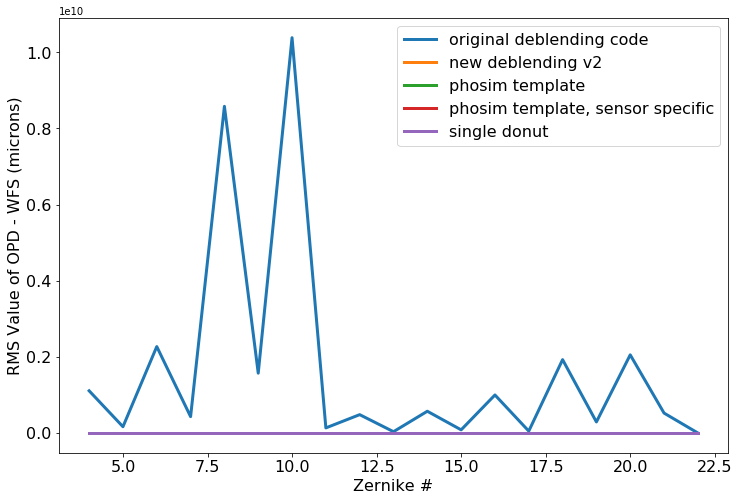

In [27]:
fig = plt.figure(figsize=(12, 8))
opd_idx = np.arange(4, 23)
plt.plot(opd_idx, np.sqrt(np.mean((opd[:3] - before[:3])**2., axis=0)), label='original deblending code', lw=3)
plt.plot(opd_idx, np.sqrt(np.mean((opd[:3] - v2_bt81[:3])**2., axis=0)), label='new deblending v2', lw=3)
plt.plot(opd_idx, np.sqrt(np.mean((opd[:3] - phosim_intra[:3])**2., axis=0)), label='phosim template', lw=3)
plt.plot(opd_idx, np.sqrt(np.mean((opd[:3] - phosim_sensor[:3])**2., axis=0)), label='phosim template, sensor specific', lw=3)
plt.plot(opd_idx, np.sqrt(np.mean((opd[:3] - single[:3])**2., axis=0)), label='single donut', lw=3)
plt.xlabel('Zernike #', size=16)
plt.ylabel('RMS Value of OPD - WFS (microns)', size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)

Text(0.5, 1.0, 'R22_S00, R22_S01, R22_S02')

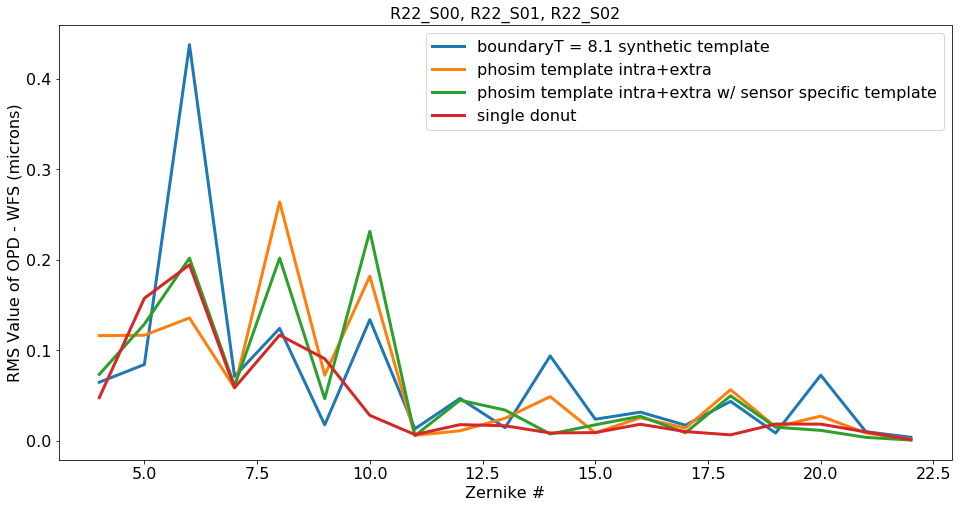

In [35]:
fig = plt.figure(figsize=(16, 8))
opd_idx = np.arange(4, 23)
plt.plot(opd_idx, np.sqrt(np.mean((opd[:3] - v2_bt81[:3])**2., axis=0)), label='boundaryT = 8.1 synthetic template', lw=3)
plt.plot(opd_idx, np.sqrt(np.mean((opd[:3] - phosim_intra[:3])**2., axis=0)), label='phosim template intra+extra', lw=3)
plt.plot(opd_idx, np.sqrt(np.mean((opd[:3] - phosim_sensor[:3])**2., axis=0)), label='phosim template intra+extra w/ sensor specific template', lw=3)
plt.plot(opd_idx, np.sqrt(np.mean((opd[:3] - single[:3])**2., axis=0)), label='single donut', lw=3)
# plt.plot(opd_idx, np.sqrt((opd[0] - before[0])**2.), label='before', lw=3)
# plt.plot(opd_idx, np.sqrt((opd[0] - after[0])**2.), label='after', lw=3)
plt.xlabel('Zernike #', size=16)
plt.ylabel('RMS Value of OPD - WFS (microns)', size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)
plt.title('R22_S00, R22_S01, R22_S02', size=16)

Text(0.5, 1.0, 'All Sensors on R22')

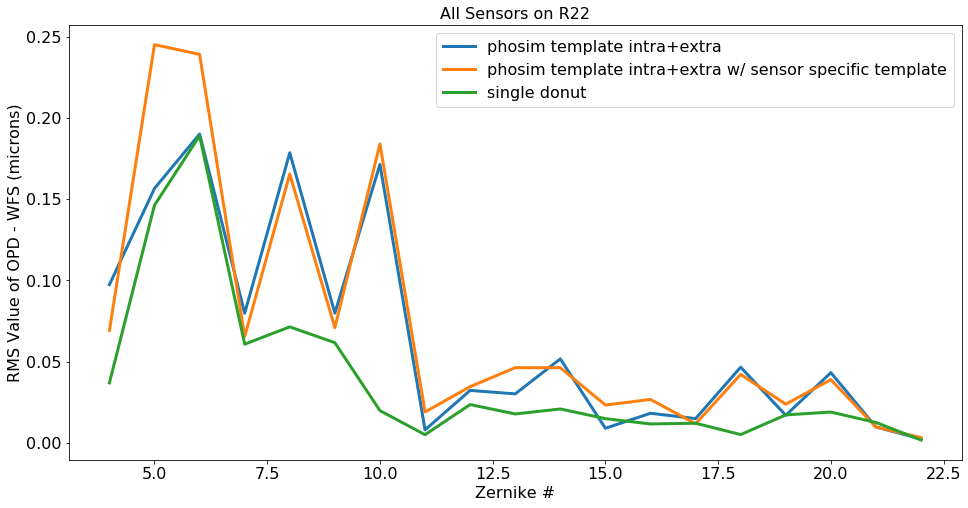

In [36]:
fig = plt.figure(figsize=(16, 8))
opd_idx = np.arange(4, 23)
plt.plot(opd_idx, np.sqrt(np.mean((opd[:9] - phosim_intra[:9])**2., axis=0)), label='phosim template intra+extra', lw=3)
plt.plot(opd_idx, np.sqrt(np.mean((opd[:9] - phosim_sensor[:9])**2., axis=0)), label='phosim template intra+extra w/ sensor specific template', lw=3)
plt.plot(opd_idx, np.sqrt(np.mean((opd[:9] - single[:9])**2., axis=0)), label='single donut', lw=3)
# plt.plot(opd_idx, np.sqrt((opd[0] - before[0])**2.), label='before', lw=3)
# plt.plot(opd_idx, np.sqrt((opd[0] - after[0])**2.), label='after', lw=3)
plt.xlabel('Zernike #', size=16)
plt.ylabel('RMS Value of OPD - WFS (microns)', size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)
plt.title('All Sensors on R22', size=16)

Text(0.5, 1.0, 'R22 Sensors excluding S10')

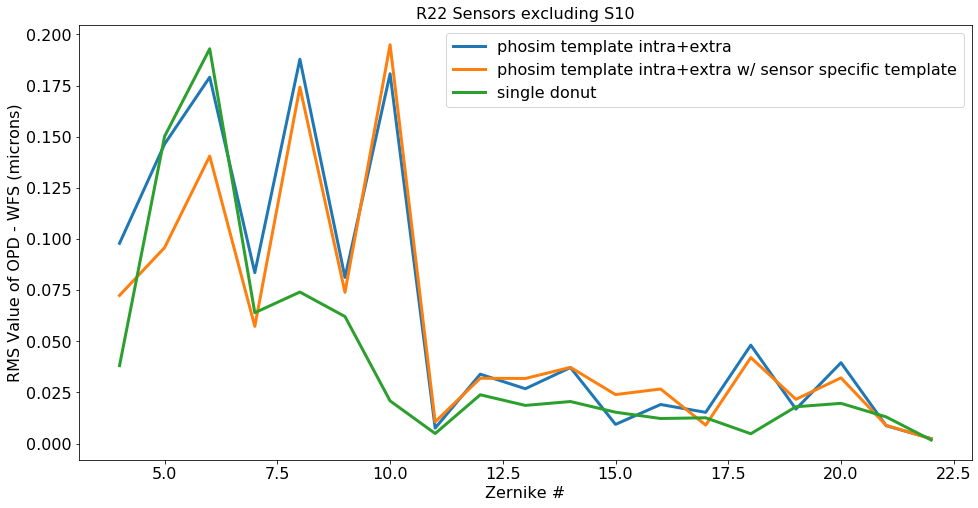

In [37]:
fig = plt.figure(figsize=(16, 8))
opd_idx = np.arange(4, 23)
plt.plot(opd_idx, np.sqrt(np.mean((opd[[0,1,2,4,5,6,7,8]] - phosim_intra[[0,1,2,4,5,6,7,8]])**2., axis=0)), label='phosim template intra+extra', lw=3)
plt.plot(opd_idx, np.sqrt(np.mean((opd[[0,1,2,4,5,6,7,8]] - phosim_sensor[[0,1,2,4,5,6,7,8]])**2., axis=0)), label='phosim template intra+extra w/ sensor specific template', lw=3)
plt.plot(opd_idx, np.sqrt(np.mean((opd[[0,1,2,4,5,6,7,8]] - single[[0,1,2,4,5,6,7,8]])**2., axis=0)), label='single donut', lw=3)
# plt.plot(opd_idx, np.sqrt((opd[0] - before[0])**2.), label='before', lw=3)
# plt.plot(opd_idx, np.sqrt((opd[0] - after[0])**2.), label='after', lw=3)
plt.xlabel('Zernike #', size=16)
plt.ylabel('RMS Value of OPD - WFS (microns)', size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)
plt.title('R22 Sensors excluding S10', size=16)

## Images

#### Postage Stamps from Original Deblender

In [60]:
img_file = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/sep_orig_deblend_5/postage/extra_singleSciImg_sensor-R22_S00_star-1_id-1_posX-232_posY-179.txt'

In [61]:
deblend_img_file = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/sep_orig_deblend_5/postage/extra_imgDeblend_full_sensor-R22_S00_star-1_id-1_posX-232_posY-179.txt'

In [62]:
img = np.genfromtxt(img_file)
deblend_img = np.genfromtxt(deblend_img_file)

Text(0.5, 1.0, 'Deblended')

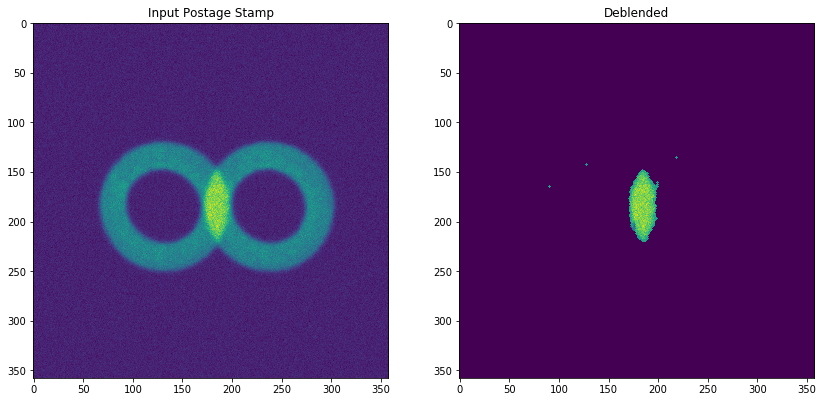

In [63]:
fig = plt.figure(figsize=(14, 7))
fig.add_subplot(1,2,1)
plt.imshow(img)
plt.title('Input Postage Stamp')
fig.add_subplot(1,2,2)
plt.imshow(deblend_img)
plt.title('Deblended')

#### Postage stamps with new deblending

#### BoundaryT = 8.1

In [96]:
img_file = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/boundaryT_81_5/postage/extra_singleSciImg_sensor-R22_S00_star-1_id-1_posX-772_posY-1589.txt'

In [97]:
deblend_img_file = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/boundaryT_81_5/postage/extra_imgDeblend_full_sensor-R22_S00_star-1_id-1_posX-772_posY-1589.txt'

In [101]:
img_file = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/boundaryT_81_5/postage/intra_singleSciImg_sensor-R22_S00_star-1_id-1_posX-772_posY-1589.txt'

In [102]:
deblend_img_file = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/boundaryT_81_5/postage/intra_imgDeblend_full_sensor-R22_S00_star-1_id-1_posX-772_posY-1589.txt'

In [103]:
img = np.genfromtxt(img_file)
deblend_img = np.genfromtxt(deblend_img_file)

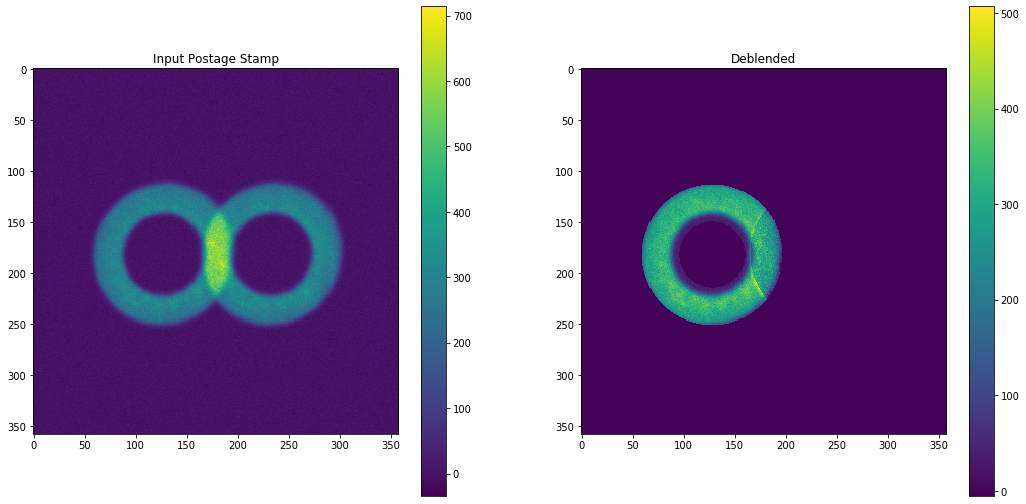

In [104]:
fig = plt.figure(figsize=(18, 9))
fig.add_subplot(1,2,1)
plt.imshow(img)
plt.title('Input Postage Stamp')
plt.colorbar()
fig.add_subplot(1,2,2)
plt.imshow(deblend_img)
plt.title('Deblended')
plt.colorbar()

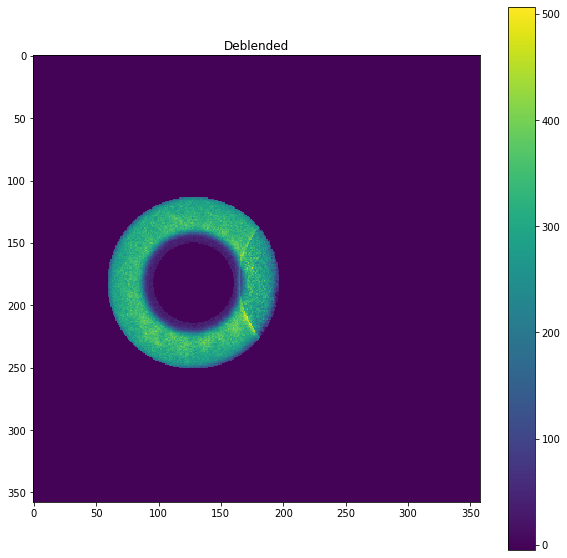

In [105]:
fig = plt.figure(figsize=(10,10))
plt.imshow(deblend_img)
plt.title('Deblended')
plt.colorbar()

#### Using Extra and Intra Phosim Templates

##### Extrafocal images

In [141]:
img_file = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/phosim_template_intraExtra_5/postage/extra_singleSciImg_sensor-R22_S00_star-1_id-1_posX-772_posY-1589.txt'

In [142]:
deblend_img_file = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/phosim_template_intraExtra_5/postage/extra_imgDeblend_full_sensor-R22_S00_star-1_id-1_posX-772_posY-1589.txt'

In [143]:
img = np.genfromtxt(img_file)
deblend_img = np.genfromtxt(deblend_img_file)

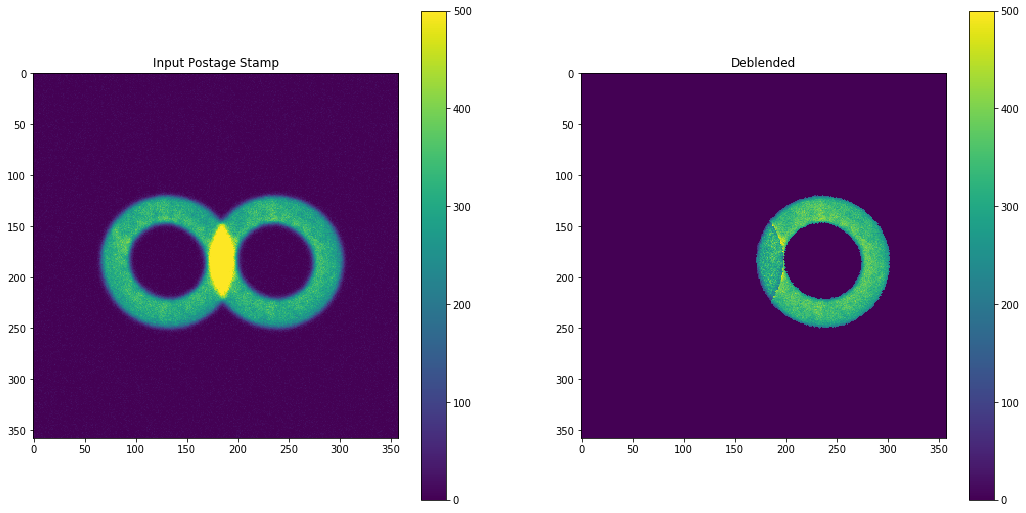

In [144]:
fig = plt.figure(figsize=(18, 9))
fig.add_subplot(1,2,1)
plt.imshow(img, vmax=500, vmin=0)
plt.title('Input Postage Stamp')
plt.colorbar()
fig.add_subplot(1,2,2)
plt.imshow(deblend_img, vmax=500, vmin=0)
plt.title('Deblended')
plt.colorbar()

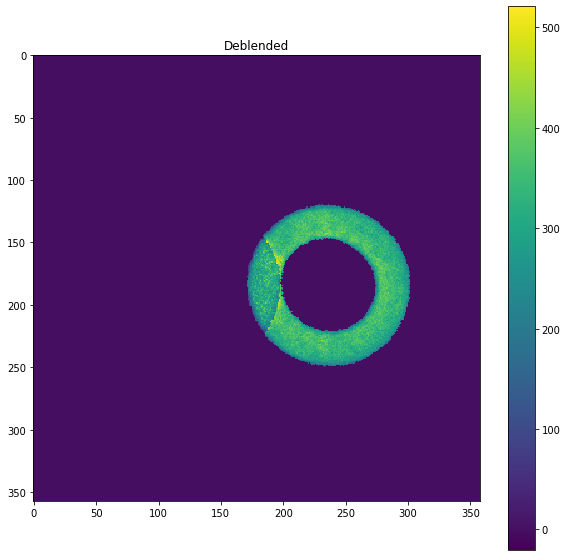

In [145]:
fig = plt.figure(figsize=(10,10))
plt.imshow(deblend_img)
plt.title('Deblended')
plt.colorbar()

##### Intrafocal images

In [146]:
img_file = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/phosim_template_intraExtra_5/postage/intra_singleSciImg_sensor-R22_S00_star-1_id-1_posX-772_posY-1589.txt'

In [147]:
deblend_img_file = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/phosim_template_intraExtra_5/postage/intra_imgDeblend_full_sensor-R22_S00_star-1_id-1_posX-772_posY-1589.txt'

In [148]:
img = np.genfromtxt(img_file)
deblend_img = np.genfromtxt(deblend_img_file)

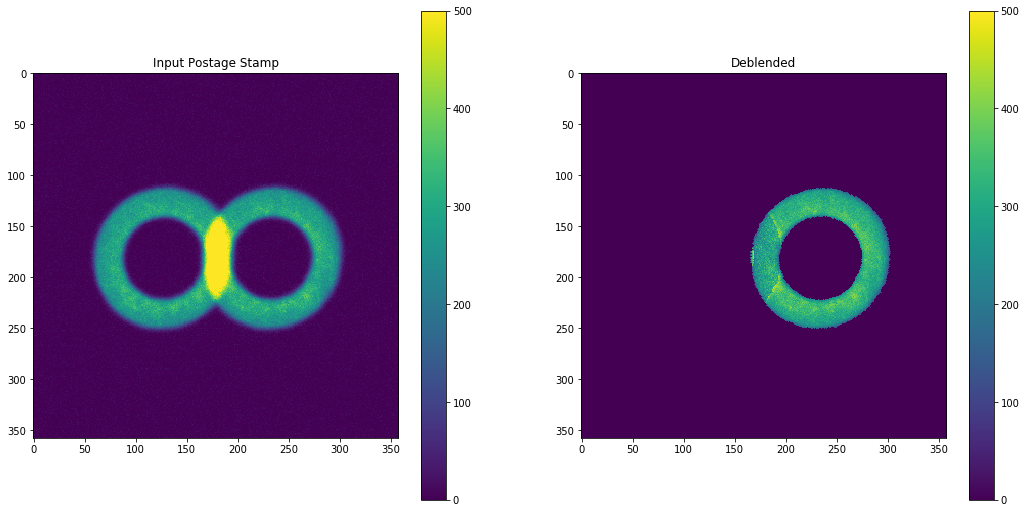

In [149]:
fig = plt.figure(figsize=(18, 9))
fig.add_subplot(1,2,1)
plt.imshow(img, vmax=500, vmin=0)
plt.title('Input Postage Stamp')
plt.colorbar()
fig.add_subplot(1,2,2)
plt.imshow(deblend_img, vmax=500, vmin=0)
plt.title('Deblended')
plt.colorbar()

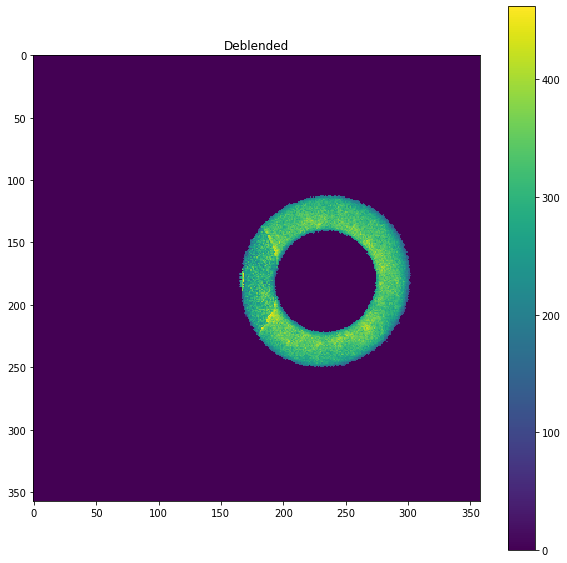

In [150]:
fig = plt.figure(figsize=(10,10))
plt.imshow(deblend_img)
plt.title('Deblended')
plt.colorbar()

#### Using Extra and Intra Phosim Templates and Sensor Selection

##### Extrafocal images

In [158]:
img_file = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/phosim_template_sensorSelect_5/postage/extra_singleSciImg_sensor-R22_S00_star-1_id-1_posX-772_posY-1589.txt'

In [159]:
deblend_img_file = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/phosim_template_sensorSelect_5/postage/extra_imgDeblend_full_sensor-R22_S00_star-1_id-1_posX-772_posY-1589.txt'

In [160]:
img = np.genfromtxt(img_file)
deblend_img = np.genfromtxt(deblend_img_file)

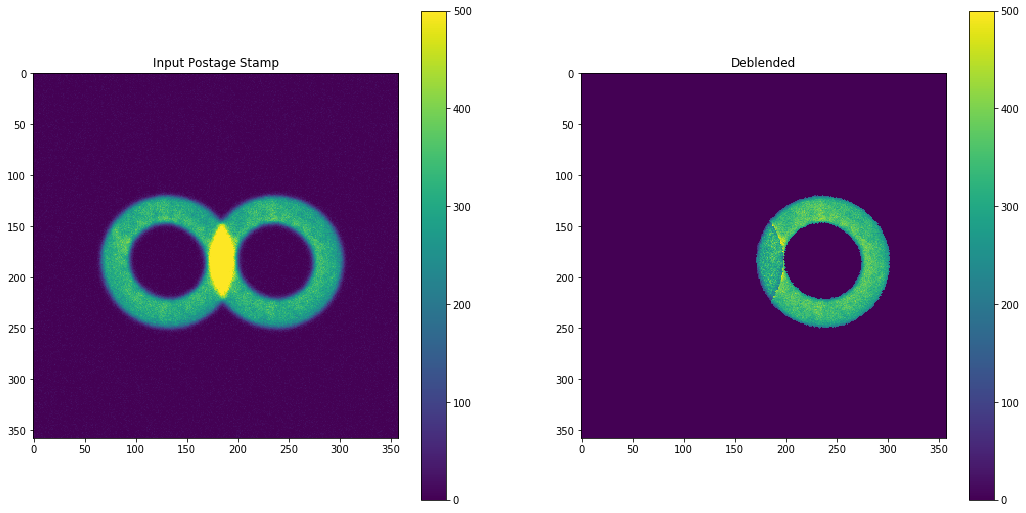

In [161]:
fig = plt.figure(figsize=(18, 9))
fig.add_subplot(1,2,1)
plt.imshow(img, vmax=500, vmin=0)
plt.title('Input Postage Stamp')
plt.colorbar()
fig.add_subplot(1,2,2)
plt.imshow(deblend_img, vmax=500, vmin=0)
plt.title('Deblended')
plt.colorbar()

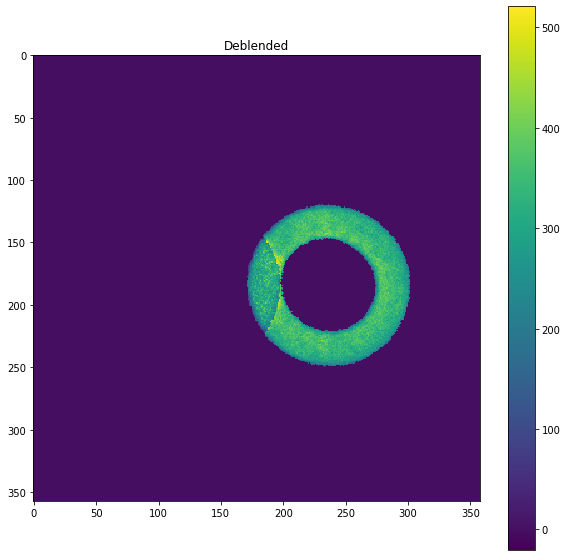

In [162]:
fig = plt.figure(figsize=(10,10))
plt.imshow(deblend_img)
plt.title('Deblended')
plt.colorbar()

##### Intrafocal images

In [163]:
img_file = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/phosim_template_sensorSelect_5/postage/intra_singleSciImg_sensor-R22_S00_star-1_id-1_posX-772_posY-1589.txt'

In [164]:
deblend_img_file = '/astro/store/epyc/users/brycek/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/test_output/phosim_template_sensorSelect_5/postage/intra_imgDeblend_full_sensor-R22_S00_star-1_id-1_posX-772_posY-1589.txt'

In [165]:
img = np.genfromtxt(img_file)
deblend_img = np.genfromtxt(deblend_img_file)

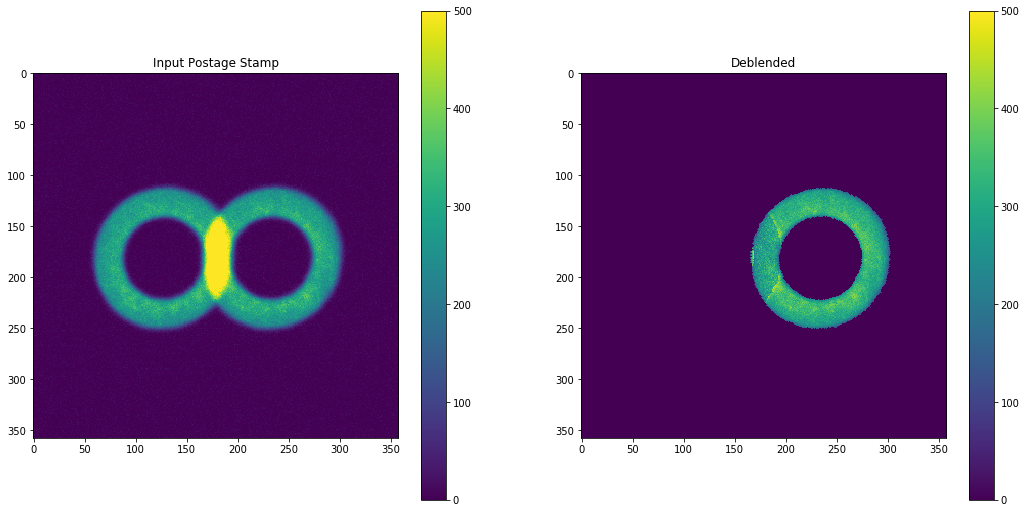

In [166]:
fig = plt.figure(figsize=(18, 9))
fig.add_subplot(1,2,1)
plt.imshow(img, vmax=500, vmin=0)
plt.title('Input Postage Stamp')
plt.colorbar()
fig.add_subplot(1,2,2)
plt.imshow(deblend_img, vmax=500, vmin=0)
plt.title('Deblended')
plt.colorbar()

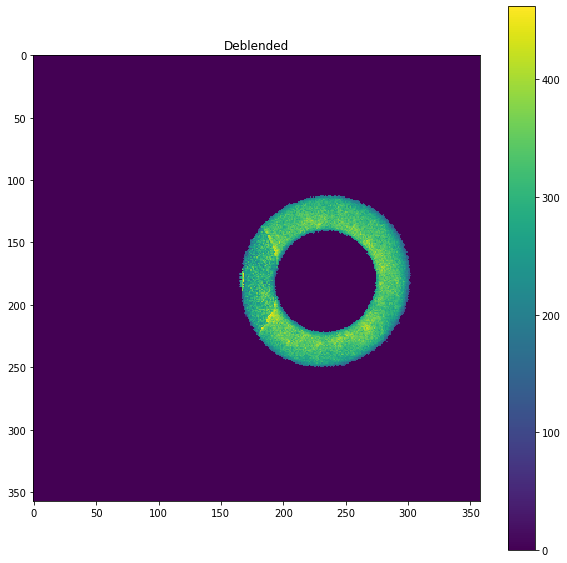

In [167]:
fig = plt.figure(figsize=(10,10))
plt.imshow(deblend_img)
plt.title('Deblended')
plt.colorbar()

#### Extra plots

Text(0.5, 1.0, 'Phosim Sensor Specific by Chip')

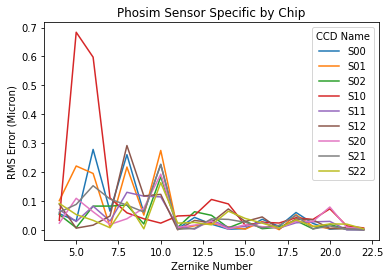

In [38]:
plt.plot(opd_idx, np.sqrt((opd[0] - phosim_sensor[0])**2.), label='S00')
plt.plot(opd_idx, np.sqrt((opd[1] - phosim_sensor[1])**2.), label='S01')
plt.plot(opd_idx, np.sqrt((opd[2] - phosim_sensor[2])**2.), label='S02')
plt.plot(opd_idx, np.sqrt((opd[3] - phosim_sensor[3])**2.), label='S10')
plt.plot(opd_idx, np.sqrt((opd[4] - phosim_sensor[4])**2.), label='S11')
plt.plot(opd_idx, np.sqrt((opd[5] - phosim_sensor[5])**2.), label='S12')
plt.plot(opd_idx, np.sqrt((opd[6] - phosim_sensor[6])**2.), label='S20')
plt.plot(opd_idx, np.sqrt((opd[7] - phosim_sensor[7])**2.), label='S21')
plt.plot(opd_idx, np.sqrt((opd[8] - phosim_sensor[8])**2.), label='S22')
plt.legend(title='CCD Name')
plt.xlabel('Zernike Number')
plt.ylabel('RMS Error (Micron)')
plt.title('Phosim Sensor Specific by Chip')

Text(0.5, 1.0, 'Phosim Sensor S11 template by Chip')

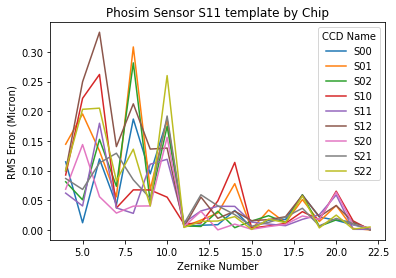

In [39]:
plt.plot(opd_idx, np.sqrt((opd[0] - phosim_intra[0])**2.), label='S00')
plt.plot(opd_idx, np.sqrt((opd[1] - phosim_intra[1])**2.), label='S01')
plt.plot(opd_idx, np.sqrt((opd[2] - phosim_intra[2])**2.), label='S02')
plt.plot(opd_idx, np.sqrt((opd[3] - phosim_intra[3])**2.), label='S10')
plt.plot(opd_idx, np.sqrt((opd[4] - phosim_intra[4])**2.), label='S11')
plt.plot(opd_idx, np.sqrt((opd[5] - phosim_intra[5])**2.), label='S12')
plt.plot(opd_idx, np.sqrt((opd[6] - phosim_intra[6])**2.), label='S20')
plt.plot(opd_idx, np.sqrt((opd[7] - phosim_intra[7])**2.), label='S21')
plt.plot(opd_idx, np.sqrt((opd[8] - phosim_intra[8])**2.), label='S22')
plt.legend()
plt.legend(title='CCD Name')
plt.xlabel('Zernike Number')
plt.ylabel('RMS Error (Micron)')
plt.title('Phosim Sensor S11 template by Chip')